In [13]:
from pyhere import here
import os

os.chdir(here())

In [19]:
import geopandas as gpd
from src.ingestion.ogc import WCSDownloader
aoi = gpd.read_file('src/ingestion/tests/data/aoi.geojson')
aoi = aoi.to_crs(epsg=27700)
aoi["geometry"] = aoi.buffer(500)

aoi.explore()

In [ ]:
aoi.bounds()

In [20]:
ea_dtm = WCSDownloader(
    endpoint="https://environment.data.gov.uk/spatialdata/lidar-composite-digital-terrain-model-dtm-1m/wcs",    
    coverage_id="13787b9a-26a4-4775-8523-806d13af58fc__Lidar_Composite_Elevation_DTM_1m",
    request_tile_pixels=(1000, 1000),
)

array = await ea_dtm.get_coverage(tuple(aoi.total_bounds), resolution=100)

ClientPayloadError: Response payload is not completed

In [16]:
array

<xarray.Dataset> Size: 4MB
Dimensions:                                                                 (
                                                                             band: 1,
                                                                             x: 1000,
                                                                             y: 1000)
Coordinates:
  * band                                                                    (band) int64 8B ...
  * x                                                                       (x) float64 8kB ...
  * y                                                                       (y) float64 8kB ...
    spatial_ref                                                             int64 8B ...
Data variables:
    13787b9a-26a4-4775-8523-806d13af58fc__Lidar_Composite_Elevation_DTM_1m  (band, y, x) float32 4MB ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -3.4028235e+38
    scale_factor:            1.0
    add_offset:              0.0
    source_url:              https://environment.data.gov.uk/spatialdata/lida...
    coverage_id:             13787b9a-26a4-4775-8523-806d13af58fc__Lidar_Comp...

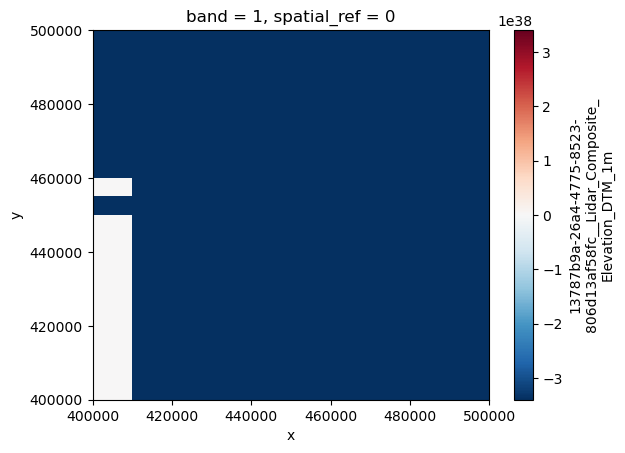

In [17]:
import rioxarray as rxr

#array = array.coarsen(x=100,y=100, boundary="trim").mean()


array[ea_dtm.coverage_id].plot()

In [18]:
array.to_array().shape

(1, 1, 1000, 1000)